In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
from google.colab import files 
uploaded = files.upload()


Saving emails.csv to emails.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['emails.csv']))
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = df.iloc[:,1:3001]
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=5)

In [6]:
rfc = RandomForestClassifier(random_state=4)

rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2782    0]
 [   0 1097]]
Accuracy Score for Train :  1.0
ROC AUC for Train :  1.0
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[876  14]
 [ 20 383]]
Accuracy Score for Test :  0.9737045630317092
ROC AUC for Test :  0.9964661109097499


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=4)



params = {'n_estimators': sp_randint(50,400),
          'max_features' : sp_randint(2,16),
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,25),
          'min_samples_leaf' : sp_randint(1,25),
          'criterion':['gini','entropy']}

rsearch = RandomizedSearchCV(rfc,
                             param_distributions=params,
                             n_iter=50,
                             cv=3, 
                             return_train_score = True,
                             scoring='roc_auc',
                             n_jobs=-1,
                            random_state=5)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f371cab6b20>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f370b810400>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f371cab6730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f370b810640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f370b810b20>},
                   random_state=5, return_train_score=True, scoring='roc_auc')

In [8]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 13,
 'min_samples_leaf': 6,
 'min_samples_split': 11,
 'n_estimators': 230}

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

rfc = RandomForestClassifier(**rsearch.best_params_,random_state=4,oob_score=True)
rfc.fit(X_train,y_train)

print("Train Results \n")
y_train_pred  = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))
print("ROC AUC for Train : ", roc_auc_score(y_train, y_train_prob))
print("OOB Score for Train : ", rfc.oob_score_)

print("+"*50)
print("Test Results \n")
y_test_pred  = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))
print("ROC AUC for Test : ", roc_auc_score(y_test, y_test_prob))

Train Results 

Confusion Matrix for Train : 
 [[2782    0]
 [ 736  361]]
Accuracy Score for Train :  0.8102603763856664
ROC AUC for Train :  0.9843855571072535
OOB Score for Train :  0.7963392626965713
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[889   1]
 [307  96]]
Accuracy Score for Test :  0.7617942768754834
ROC AUC for Test :  0.9739231048038587


In [10]:
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1

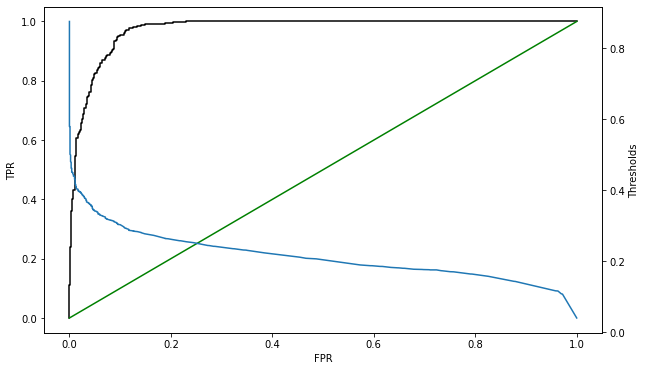

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr,tpr,'black')
ax.plot(fpr,fpr,'green')
ax1=ax.twinx()
ax1.plot(fpr,thresholds)
ax1.set_ylabel("Thresholds")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.show()
